<a id='top'></a>

# Introduction to the SocialSim package


<br>

 <center> <img src=img/socialsim_logo.jpg  width=100%> </center> 


## Notebook Overview

### <a href='#intro'> 1) Intro to the SocialSim Package </a>

### <a href='#explore'> 2) Quick exploration of the package - Measurements and Metrics </a>
 
### <a href='#load_data'> 3) How do we load data we can use? </a> 

### <a href='#demo'> 4) Demo of one of our measurements </a>

<a id='intro'></a>


## Intro to the SocialSim Package
[Jump to top](#top)

### Measuring Information Spread Within and Across Social Platforms

SocialSim is a comprehensive Python package with 100+ measurements for quantifying many properties of online information spread. You can examine the spread of piece(s) of information online in terms of different
    - entity types (user versus content)
    - groups (users, communities, population)
    - temporal scales (overall or over time)
    - behaviors or phenomena (social activity, cascades, cross-platform spread, etc.)


 <center> <img src=img/socialsim_explanation.png  width=80%> </center> 

### The SocialSim Evaluation Approach 
In the SocialSim package, there are two primary focuses: the **measurement** space and the **metrics** space. 

The package provides functionality to **measure** both _simulation_ and _ground truth_ representations of events (who, what, where, when) at a range of resolutions (user, community, population) and compare the results to evaluate the simulations against the ground truth using the **metrics** provided. 

 <center> <img src=img/socialsim_evaluation_approach.png  width=80%> </center> 
 
 
The package provides functionality to **measure** both _simulation_ and _ground truth_ representations of events (who, what, where, when) at a range of resolutions (user, community, population) and compare the results to evaluate the simulations against the ground truth using the **metrics** provided. 

#### How good are your simulations of online social environments? Find out using SocialSim!

<br>


<a id='explore'></a>

## Exploring the SocialSim package
[Jump to top](#top)

### Imports
First, you need to import the necessary packages. In this notebook we only require two packages:

- **socialsim** 

- **matplotlib** (for plotting measurements or metrics from the socialsim package)

The inclusion of **"%matplotlib inline"** enables plots to be displayed directly below the code cell, within the notebook itself. 


(For more details on %matplotlib inline and other <i> magic commands </i> refer to: https://ipython.readthedocs.io/en/stable/interactive/magics.html)

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import socialsim as ss

<br>

If you were unable to install SNAP, run the cell below and then re-run the cell above to ignore the warnings about backend code switching to SNAP workarounds using python-igraph only:

In [8]:
import warnings
warnings.filterwarnings('ignore')

<br>

We can use the **help()** call to quickly list the contents of the package:

In [9]:
help(ss)

Help on package socialsim:

NAME
    socialsim

PACKAGE CONTENTS
    extract_ground_truth
    load
    measurements (package)
    metrics
    record
    run
    twitter_cascade_reconstruction
    utils
    visualizations (package)

FILE
    /Users/grac833/Documents/Projects/SocialSim/temp/temp/socialsim_package_docker/socialsim/__init__.py




Although we will mainly focus on the **measurements** in this tutorial, we will highlight the **metrics** available later in this notebook and **customization** functionality in the next notebook - how to format platform API data for use with our measurements, how to write your own measurement configuration, and more!

<br>

### What kind of measurements do we have?

Once again, you can use the **help()** call to quickly list the contents of *ss.measurements* of the SocialSim package:

In [10]:
help(ss.measurements)

Help on package socialsim.measurements in socialsim:

NAME
    socialsim.measurements

PACKAGE CONTENTS
    cross_platform
    information_cascade
    measurements
    metadata
    model_parameters (package)
    multi_platform
    persistent_groups
    recurrence
    social_activity
    social_structure
    validators

FILE
    /Users/grac833/Documents/Projects/SocialSim/temp/temp/socialsim_package_docker/socialsim/measurements/__init__.py




### We are going to focus on the multi-platform, social structure, cascade, recurrence, persistent groups, and cross-platform measurements in our interactive sessions today.

<br>

### Before we get into all these measurements, what kind of metrics do we have?

You can scroll through each of the metrics and their descriptions.

In [11]:
ss.metrics.list_metrics()

1) absolute_difference: Absolute difference between ground truth simulation measurement. Meant for scalar valued measurements.

2) absolute_percentage_error: Absolute percentage error between ground truth simulation measurement Meant for scalar valued measurements

3) js_divergence: Jensen-Shannon Divergence implemenation A symmetric variant on KL Divergence which also avoids infinite outputs

4) kl_divergence: KL Divergence between the ground truth and simulation data Meant for distributional measurements

5) kl_divergence_smoothed: Smoothed version of the KL divergence which smooths the simulation output to prevent infinities in the KL divergence output

6) ks_test: Meant for measurements which are continuous or numeric distributions

7) pearson: Pearson correlation coefficient between simulation and ground truth

8) r2: R-squared value between ground truth and simulation

9) rbo_score: Rank biased overlap (RBO) implementation (http://codalism.com/research/papers/wmz10_tois.pdf) A ra

We won't be going into detail on the metrics in this tutorial, but you can always explore the code or use the
**?function** call to explore the signature and full docstring of the metric if you'd like to use one of the metrics outside of this tutorial setting.  

<a id='load_data'></a>
<br><br>

## Load Data
[Jump to top](#top)

#### Now, we need to load a data file. Let's load **tutorial_multi-platform.json**.

You can use the **load_data** function provided by our **socialsim** package (**ss.load_data()**) which will load the data from the json file into a pandas dataframe ready to be used in any of our measurements. 
Here, we are setting the **verbose** flag to **False** because the sample should not take long to load. 
The default is **verbose=True** so that progress updates are printed as the data is loaded.

In [12]:
dataset_path = '../data/tutorial_introduction.json'
dataset = ss.load_data(dataset_path, verbose=False)

You can run the next cell with the **verbose=False** removed to see the progress updates:

In [13]:
dataset = ss.load_data(dataset_path)

Loading dataset at ../data/tutorial_introduction.json


81.08974358974359

100                                                                                                 
Converting strings to datetime objects... Done


#### Now that the data is loaded, let's look at a preview of the first 3 rows:

In [14]:
n_rows_to_preview = 3
dataset.head(n_rows_to_preview)

,actionType,informationID,nodeID,nodeTime,nodeUserID,parentID,platform,rootID
0,post,CVE-2015-6620,t3_2dRXuDU88Z4K_c90e0hVBQ,2015-12-10 08:41:03,vHwXTX4FohkDUqQMdjb3zg,t3_2dRXuDU88Z4K_c90e0hVBQ,reddit,t3_2dRXuDU88Z4K_c90e0hVBQ
1,post,CVE-2015-6620,t3_aFfwpt33hRSUsNBL6QUKHw,2015-12-10 09:40:58,vHwXTX4FohkDUqQMdjb3zg,t3_aFfwpt33hRSUsNBL6QUKHw,reddit,t3_aFfwpt33hRSUsNBL6QUKHw
2,post,CVE-2015-6620,t3_Vs8THUXT5VwFFL_HOcf6aA,2015-12-10 10:40:37,vHwXTX4FohkDUqQMdjb3zg,t3_Vs8THUXT5VwFFL_HOcf6aA,reddit,t3_Vs8THUXT5VwFFL_HOcf6aA


Note: 

Events (posts, comments, etc) are represented as nodes in our dataset. So, **nodeID** is the unique ID for the event represented in each row. E.g., the first row describes the **post** event **t3_2dRXuDU88Z4K_c90e0hVBQ** on the **reddit** platform.

<br>

### Before we get into any measurements of our sample, lets answer a few questions about the data itself:



#### There are four pieces of information of interest in this dataset, run the next cell to see what these pieces of information are.

In [15]:
set(dataset['informationID'])

{'CVE-2015-6620',
 'crashoverride',
 'https://github.com/1BMleeDQ3Qpa4qgiHI4Lmw/hgSSP_1s_cWwu6bjWdLnkQ',
 'vbs'}

<br>

1 piece of information related to a CVE ( Common Vulnerabilities and Exposures &mdash; a catalog of information security vulnerabilities):
   - **CVE-2015-6620** - an android-related vulnerability

<centering> <img src=./img/cve_2015_6620_bg.png width=80%> </src> </centering>
   
2 pieces of information related to Malware:
   - **crashoverride** - a malware that attacked power grids
   
<centering><img src=./img/crashoverride_bg.png width=80%></src></centering>
   
   - **vbs** - a malware virus capable of modifying system settings
   
   
and 1 piece of information related to a GitHub repository:
   - **github.com/1BMleeDQ3Qpa4qgiHI4Lmw/hgSSP_1s_cWwu6bjWdLnkQ** - (anonymized) repository linked to exploits.
   
<br>

#### How many types of <i>actions</i> are in this sample?

In [16]:
unique_actions = set(dataset['actionType'])
n_unique_actions = len(unique_actions)
print('{} unique actions:\n {}'.format(n_unique_actions,list(unique_actions)))

12 unique actions:
 ['ForkEvent', 'WatchEvent', 'PushEvent', 'comment', 'post', 'IssueCommentEvent', 'retweet', 'reply', 'tweet', 'quote', 'CreateEvent', 'PullRequestEvent']


<br>

#### How many <i>platforms</i> are in this sample?

In [17]:
unique_platforms = set(dataset['platform'])
n_unique_platforms = len(unique_platforms)
print('{} unique platforms:\n {}'.format(n_unique_platforms,list(unique_platforms)))

3 unique platforms:
 ['twitter', 'reddit', 'github']


<br>

#### How are those actions split across platforms?

In [18]:
for platform in set(dataset['platform']):
    print(platform)
    print('\t',sorted(list(set(dataset[dataset['platform']==platform]['actionType']))))

twitter
	 ['quote', 'reply', 'retweet', 'tweet']
reddit
	 ['comment', 'post']
github
	 ['CreateEvent', 'ForkEvent', 'IssueCommentEvent', 'PullRequestEvent', 'PushEvent', 'WatchEvent']


<br>

You can see that actionTypes differ across the platforms &mdash; e.g. users submit **posts** or **comment** on posts on reddit.

#### How many  <i>users</i>, and <i>user actions</i> are in this sample?

In [19]:
print('Overall:')
print('\t{} rows of data\n'.format(format(len(dataset),',d')))
for item_type, item_column in [('nodes','nodeID'),('users','nodeUserID')]:
    unique_items = set(dataset[item_column])
    n_unique_items = len(unique_items)
    print('\t{} {}'.format(format(n_unique_items,',d'),item_type))
    
for platform in unique_platforms:
    print('\nFor the "{}" platform:'.format(platform))
    platform_data = dataset[dataset['platform']==platform].copy()
    print('\t{} rows of data\n'.format(format(len(platform_data),',d')))
    for item_type, item_column in [('nodes','nodeID'),('users','nodeUserID')]:
        unique_items = set(platform_data[item_column])
        n_unique_items = len(unique_items)
        print('\t{} {}'.format(format(n_unique_items,',d'),item_type))

Overall:
	2,184 rows of data

	2,071 nodes
	838 users

For the "twitter" platform:
	1,867 rows of data

	1,867 nodes
	696 users

For the "reddit" platform:
	196 rows of data

	196 nodes
	53 users

For the "github" platform:
	121 rows of data

	8 nodes
	89 users


<a id='demo'></a>
<br>

## Demo of one of our measurements
[Jump to top](#top)

Now that we have explored the data, let's try to run one of our measurements. We are going to start out with one of the Multi-Platform measurements. 


To use any of our measurements, we need to first instantiate a measurements object using our previously loaded **dataset**: 

In [20]:
mp = ss.measurements.multi_platform.MultiPlatformMeasurements(dataset)

<br>

#### Let's try out the **number_of_shares_over_time** measurement! 

First, we can get more details on this measurements using the **?function** call for the **MultiPlatformMeasurements.number_of_shares_over_time** function
which will print out the signature and docstring:

In [21]:
?ss.measurements.multi_platform.MultiPlatformMeasurements.number_of_shares_over_time

<br>

As we see in the description, number_of_shares_over_time determines the number of times a _piece of information_ is shared. Based on the level chosen (node, community, population) this measurement determines the number of shares for a _piece of information_, the average number of shares across pieces of information within a given community, or the average number of shares across multiple _pieces of information_ in the population as a whole over time.

We are going to run this measurement on the **node** level focusing on the number of shares over time for each _piece of information_ in this dataset.

#### What platforms does each piece of information spread over?

In [22]:
dataset.groupby('informationID',as_index=False).agg({'platform':lambda x:set(x)})

,informationID,platform
0,CVE-2015-6620,"{reddit, github}"
1,crashoverride,"{twitter, reddit}"
2,https://github.com/1BMleeDQ3Qpa4qgiHI4Lmw/hgSS...,"{twitter, reddit}"
3,vbs,"{twitter, reddit}"


We see that the information related to CVE ( Common Vulnerabilities and Exposures &mdash; a catalog of information security vulnerabilities), **CVE-2015-6620** spread across **Reddit** and **GitHub**, while the others spread across **Reddit** and **Twitter**.

<br>

### Let's run the measurement!

Since we are running at the **node** level, we need to pass **node_level=True**.

In [23]:
number_of_shares_over_time = mp.number_of_shares_over_time(node_level=True)

<br>

This returns a dictionary object mapping a dataframe of shares ('value' column) over time ('nodeTime' column) for each of the pieces of information in the **informationID** column:

In [24]:
print('number_of_shares_over_time is ', type(number_of_shares_over_time))
print('\nThe keys are:\n',list(number_of_shares_over_time.keys()))
print('\nnumber_of_shares_over_time[CVE-2015-6620]:')
number_of_shares_over_time['CVE-2015-6620'].head()

number_of_shares_over_time is  <class 'dict'>

The keys are:
 ['CVE-2015-6620', 'crashoverride', 'https://github.com/1BMleeDQ3Qpa4qgiHI4Lmw/hgSSP_1s_cWwu6bjWdLnkQ', 'vbs']

number_of_shares_over_time[CVE-2015-6620]:


,nodeTime,value
0,2015-12-10,15.0
1,2015-12-11,24.0
2,2015-12-12,22.0
3,2015-12-13,25.0
4,2015-12-14,6.0


#### Now, we can plot these distributions of shares over time for each of our pieces of information of interest!


The **generate_plot** function (accessible using **ss.generate_plot()**) takes the pandas dataframe with the results of the measurement (which we pass as **measurement_output**), the name of the measurement (given with **measurement_name=single_measurement**), and a boolean flag for whether to show the plot once generated (**show=True**).

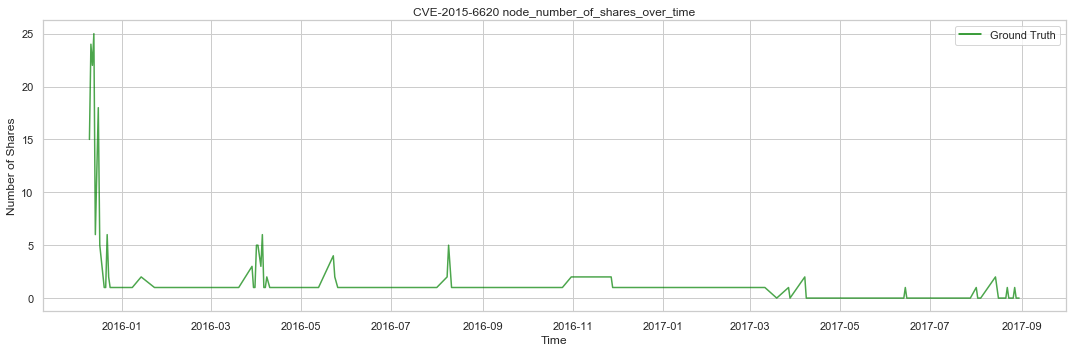

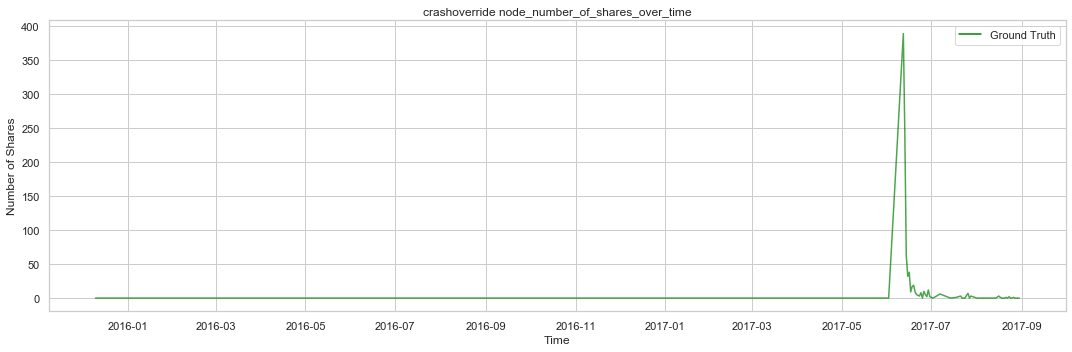

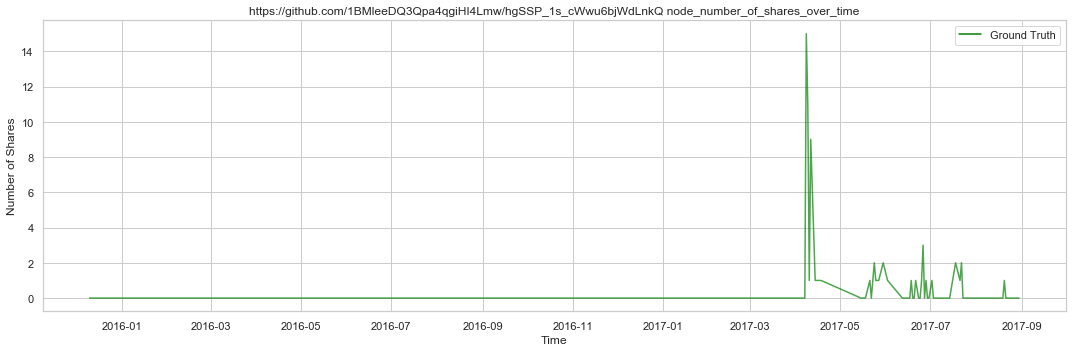

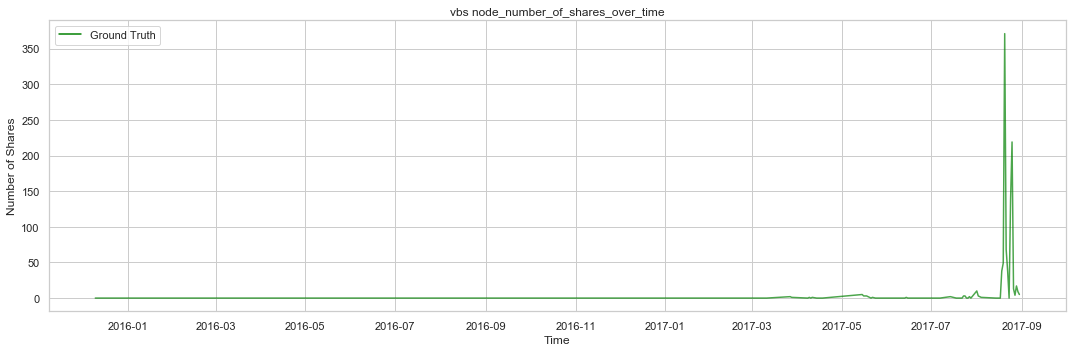

In [25]:
ss.generate_plot(
    number_of_shares_over_time, 
    measurement_name='node_number_of_shares_over_time',
    show=True
    )

<br><br>

## Next up, Data Extraction!